In [1]:
from tensorflow.keras import datasets

In [2]:
df = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [24]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [25]:
x_train.shape , y_train.shape

((60000, 28, 28), (60000,))

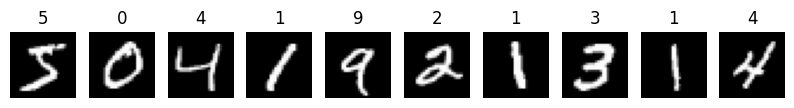

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')

In [27]:
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

In [28]:
x_train.shape , x_test.shape

((60000, 784), (10000, 784))

In [30]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [31]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [44]:
x_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [33]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [36]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [38]:
y_train[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [46]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(120, activation='sigmoid', input_shape=(784,)))
model.add(layers.Dense(60, activation='sigmoid'))
model.add(layers.Dense(10, activation='sigmoid'))

In [47]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
result = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2405 - loss: 2.2577 - val_accuracy: 0.5161 - val_loss: 2.0352
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5758 - loss: 1.8932 - val_accuracy: 0.7338 - val_loss: 1.3671
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7420 - loss: 1.2315 - val_accuracy: 0.8134 - val_loss: 0.8839
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8137 - loss: 0.8346 - val_accuracy: 0.8470 - val_loss: 0.6618
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8464 - loss: 0.6441 - val_accuracy: 0.8683 - val_loss: 0.5430
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8631 - loss: 0.5399 - val_accuracy: 0.8787 - val_loss: 0.4745
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8744 - loss: 0.4811 - val_accuracy: 0.8880 - val_loss: 0.4298
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8822 - loss: 0.4388 - 

In [49]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [50]:
predicted_classes = predictions.argmax(axis=1)
true_classes = y_test.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])